In [2]:
from datascience import *
import sympy
solve = lambda x,y: sympy.solve(x-y)[0] if len(sympy.solve(x-y))==1 else "Not Single Solution"
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

# Cournot Competition

One model of understanding oligopolies comes in **Cournot competition**, named for Aontoine Cournot who first proposed it. Cournot competition is a model describing a market in which firms compete by changing their output. In Cournot competition, there are a fixed number of firms in a market that produce the same product. Firms do not collude but have _market power_ (i.e. each firm's output decisions affect the price of the good). Each firm knows the number of firms in the market and has its own cost function that it uses to determine its level of output.

OPEC is a good example of a Cournot oligopoly: its participants affect prices by changing their output. OPEC also demonstrates a flaw in the reasoning behind Cournot competition: the equilibrium state of a Cournot oligopoly suggests that collusion by market participants is the rational policy, but in reality game theory shows us this cannot be the "true" equilibrium because cartel members undercut one another in a bid for market share.

## Cournot Equilibrium

To find the equilibrium state of a Cournot duopoly, let $c$ be the (constant) marginal cost of both firms (i.e. each additional good costs the same amount to produce regardless of the number currently being produced), $p_1$ and $p_2$ be the prices of firms 1 and 2, respectively, and $q_1$ and $q_2$ their quantities. Let $P$ be the price function for a given level of production. We know that the equilibrium price is $p_1 = p_2 = P(q_1 + q_2)$, and therefore firm 1's profit is $q_1(P(q_1 + q_2) - c)$ (since $c$ is constant).

The first step is to calculate firm 1's residual demand. If firm 1 believes that firm 2 is going to produce $q_2$ units of output, we can draw a **residual demand curve** for firm 1. If firm 1 decides to produce 0 units of output, then the price of the good is $P(0 + q_2) = P(q_2)$. If they produce $q_1$ units, it's $P(q_1 + q_2)$. Using this information, we can draw the residual demand curve. This curve will be called $d_1$.

Now we need to determine firm 1's optimal output, which occurs where the **marginal revenue** (the additional revenue gained by increasing production by one unit) intersects the marginal cost $c$. The marginal revenue curve is the line with twice the slope of the residual demand and the same $y$-intercept. We can show this by taking the derivative of the revenue function $\text{TR} = P(Q) \cdot Q$ where $\text{TR}$ is the total revenue. If the demand curve $P(Q)$ has slope $m$ and $y$-intercept $b$, this is

$$\begin{aligned}
\text{TR} &= Q (mQ + b) \\
&= m Q^2 + bQ \\
\frac{\text{d}}{\text{d} Q} \text{TR} &= 2mQ + b
\end{aligned}$$

Thus, the marginal revenue curve is a line with slope $2m$ and $y$-intercept $b$. The marginal revenue of firm 1 is denoted $r_1$ and is a function of $q'_1$.

Let $q'_1$ be the optimum output for firm 1, such that $r_1(q'_1) = c$. The graph below shows the curves and their relationships to one another.

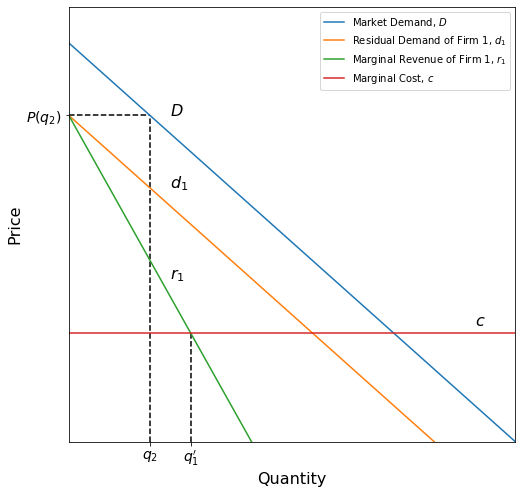

In [3]:
m, b = -0.5, 9
q_2 = 4
c = 3
D_fn = lambda x: m * x + b + 2
P = lambda x: D_fn(x + q_2)
r_1_fn = lambda x: 2 * m * x + m * q_2 + b + 2
r_1_inv = lambda x: (x - m * q_2 - b - 2) / 2 / m

q_1 = np.linspace(0, 25, 1000)
D = D_fn(q_1)
d_1 = P(q_1)
r_1 = r_1_fn(q_1)

q_1_prime = r_1_inv(c)

plt.figure(figsize=[8,8])

# demand
plt.plot(q_1, D, label=r"Market Demand, $D$")
plt.text(5, b, r"$D$", size=16)

# residual demand
plt.plot(q_1, d_1, label=r"Residual Demand of Firm 1, $d_1$")
plt.text(5, b - 2, r"$d_1$", size=16)

# marginal revenue
plt.plot(q_1, r_1, label=r"Marginal Revenue of Firm 1, $r_1$")
plt.text(5, b - 4.5, r"$r_1$", size=16)

# marginal cost
plt.plot(q_1, c * np.ones_like(q_1), label=r"Marginal Cost, $c$")
plt.text(20, 3.2, r"$c$", size=16)

# optimum quantity
plt.vlines(q_1_prime, 0, 3, linestyles="dashed")

# q2
plt.vlines(q_2, 0, D_fn(q_2), linestyles="dashed")
plt.hlines(P(0), 0, q_2, linestyles="dashed")

plt.xlim([0,22])
plt.ylim([0,12])
plt.xticks([r_1_inv(c), q_2], [r"$q^\prime_1$", r"$q_2$"], size=14)
plt.yticks([P(0)], [r"$P(q_2)$"], size=14)
plt.xlabel("Quantity", size=16)
plt.ylabel("Price", size=16)
plt.legend();

$q'_1$ is a function of $q_2$ as firm 1's optimal output depends on what it thinks firm 2 is going to produce. To find the equilibrium, we must define $q'_1$ for all possible values of $q_2$. Consider the case when $q_2=0$; then firm 1's residual demand is the same as the market demand, since $d_1$ and $D$ are separated horizontally by a difference of $q_2$. Firm 1 then produces the monopoly quantity $q_m$, since that is where its marginal revenue equals its marginal cost. If, however, firm 2 chooses to produce at a level of perfect competition, $q_c$, the optimum for firm 1 is to produce 0 output units, since their marginal revenue will intersect $c$ at $q_1 = 0$. The graph below shows both of these cases.

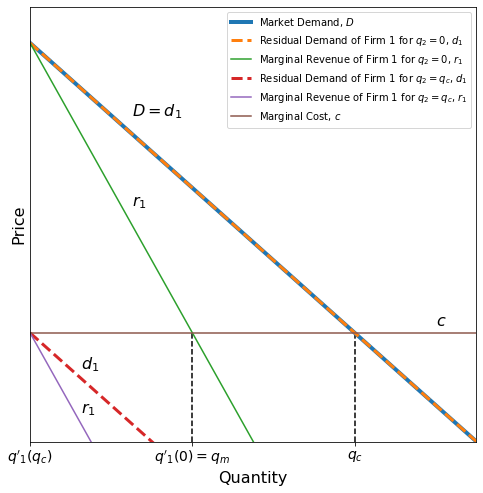

In [4]:
m, b = -0.5, 9
q_2 = 0
c = 3
D_fn = lambda x: m * x + b + 2
P = lambda x: D_fn(x + q_2)
r_1_fn = lambda x: 2 * m * x + m * q_2 + b + 2
r_1_inv = lambda x: (x - m * q_2 - b - 2) / 2 / m

q_1 = np.linspace(0, 25, 1000)
D = D_fn(q_1)
d_1 = P(q_1)
r_1 = r_1_fn(q_1)

q_1_prime = r_1_inv(c)

plt.figure(figsize=[8,8])

# demand
plt.plot(q_1, D, label=r"Market Demand, $D$", linewidth=4)
plt.text(5, b, r"$D = d_1$", size=16)

# residual demand
plt.plot(q_1, d_1, label=r"Residual Demand of Firm 1 for $q_2=0$, $d_1$", linestyle="dashed", linewidth=3)
# plt.text(5, b - 2, r"$d_1$", size=16)

# marginal revenue
plt.plot(q_1, r_1, label=r"Marginal Revenue of Firm 1 for $q_2=0$, $r_1$")
plt.text(5, b - 2.5, r"$r_1$", size=16)

# case when q_2 = q_c
m, b = -0.5, 9
q_2 = 16
c = 3
D_fn = lambda x: m * x + b + 2
P = lambda x: D_fn(x + q_2)
r_1_fn = lambda x: 2 * m * x + m * q_2 + b + 2
r_1_inv = lambda x: (x - m * q_2 - b - 2) / 2 / m

q_1 = np.linspace(0, 25, 1000)
D = D_fn(q_1)
d_1 = P(q_1)
r_1 = r_1_fn(q_1)

# residual demand
plt.plot(q_1, d_1, label=r"Residual Demand of Firm 1 for $q_2=q_c$, $d_1$", linestyle="dashed", linewidth=3)
plt.text(2.5, 2, r"$d_1$", size=16)

# marginal revenue
plt.plot(q_1, r_1, label=r"Marginal Revenue of Firm 1 for $q_2=q_c$, $r_1$")
plt.text(2.5, 0.8, r"$r_1$", size=16)

# marginal cost
plt.plot(q_1, c * np.ones_like(q_1), label=r"Marginal Cost, $c$")
plt.text(20, 3.2, r"$c$", size=16)

# q_c
plt.vlines(D_fn(-10), 0, c, linestyles="dashed")

# q'_1(0)
plt.vlines(r_1_inv(-5), 0, 3, linestyles="dashed")

plt.xlim([0,22])
plt.ylim([0,12])
plt.xticks([D_fn(-10), r_1_inv(-5), 0], [r"$q_c$", r"$q'_1(0) = q_m$", r"$q'_1(q_c)$"], size=14)
plt.yticks([], [], size=14)
plt.xlabel("Quantity", size=16)
plt.ylabel("Price", size=16)
plt.legend();

When demand is linear and marginal cost is constant, the function $q'_1$ is also linear. Because we have two points, $q'_1(0) = q_m$ and $q'_1(q_c) = 0$, we can draw the curve $q'_1$. Remember that $q'_1$ is a function of what firm 1 *thinks* firm 2 is going to produce.

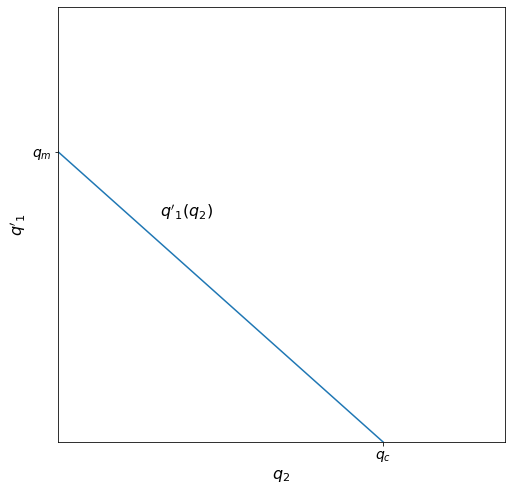

In [5]:
q_m = r_1_inv(-5)
q_c = D_fn(-10)

p1 = (0, q_m)
p2 = (q_c, 0)

slope = (p2[1] - p1[1]) / (p2[0]- p1[0])
intercept = p1[1] - slope * p1[0]

xs = np.linspace(0, 25, 1000)
ys = slope * xs + intercept

plt.figure(figsize=[8,8])

plt.plot(xs, ys, label=r"$q'_1$")
plt.text(5, intercept - 1.8, r"$q'_1(q_2)$", size=16)

plt.xlim([0,22])
plt.ylim([0,12])
plt.xticks([q_c], [r"$q_c$"], size=14)
plt.yticks([q_m], [r"$q_m$"], size=14)
plt.xlabel("$q_2$", size=16)
plt.ylabel("$q'_1$", size=16);

Finally, we need to know firm 2's reaction to firm 1's production. Because both firms have the same cost function, firm 2's optimum output $q'_2$ given firm 1's output $q_1$ is the inverse of firm 1's. The equilibrium of the model is at the intersection of these reaction functions.

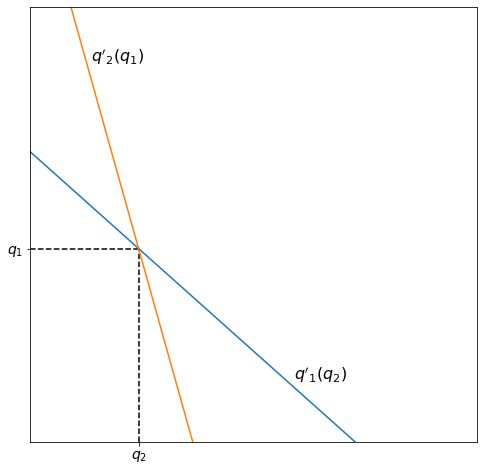

In [6]:
q_m = r_1_inv(-5)
q_c = D_fn(-10)

p1 = (0, q_m)
p2 = (q_c, 0)

slope = (p2[1] - p1[1]) / (p2[0]- p1[0])
intercept = p1[1] - slope * p1[0]

xs = np.linspace(0, 25, 1000)
ys1 = slope * xs + intercept
ys2 = (xs - intercept) / slope

plt.figure(figsize=[8,8])

plt.plot(xs, ys1, label=r"$q'_1$")
plt.plot(xs, ys2, label=r"$q'_2$")
plt.text(13, intercept - 6.3, r"$q'_1(q_2)$", size=16)
plt.text(3, intercept + 2.5, r"$q'_2(q_1)$", size=16)

x_star = - (slope + 1) * intercept / (slope**2 - 1)
y_star = slope * x_star + intercept
plt.vlines(x_star, 0, y_star, linestyle="dashed")
plt.hlines(y_star, 0, x_star, linestyle="dashed")

plt.xlim([0,22])
plt.ylim([0,12])
plt.xticks([x_star], [r"$q_2$"], size=14)
plt.yticks([y_star], [r"$q_1$"], size=14);

## Implications

The Cournot model implies that output is greater in a Cournot duopoly than in a monopoly, but still lower than perfect competition. Prices are also lower in a Cournot duopoly, but higher than perfect competition. Cournot equilibria are also a subset of Nash equilibria, and so the equilibrium we just derived is one from which neither player will likely deviate. As noted earlier, Cournot also indicates that members of a duopoly could form a cartel and raise profits by colluding.

## Applying Cournot

Now that we have shown how to derive the Cournot equilibrium, let's apply this to a problem. Consider the industry of airline manufacturing: there are two main competitors, Boeing and Airbus, and for this problem we will think of this market as a Cournot duopoly. Suppose the market demand curve is given by $P = -1.89 Q + 148.89$ where the price is in millions of \$ and that the marginal cost of both firms is constant at $c = 100$.

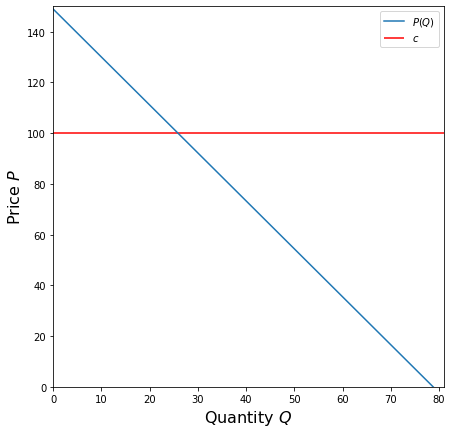

In [7]:
def P_fn(Q):
    return -1.89 * Q + 148.89

Qs = np.linspace(-100, 100, 1000)
Ps = P_fn(Qs)

plt.figure(figsize=[7,7])
plt.plot(Qs, Ps, label=r"$P(Q)$")
plt.hlines(100, -1, 100, color="r", label=r"$c$")
plt.xlim(0, 81)
plt.ylim(0, 150)
plt.xlabel(r"Quantity $Q$", size=16)
plt.ylabel(r"Price $P$", size=16)
plt.legend();

Now suppose we want to find the equilibrium and that Boeing believes that Airbus will produce at quantity $q_2 = 20$. To find the equilibrium, we need to start by finding Boeing's residual demand curve. This is given by 

$$\begin{aligned}
d_1(q_1) &= P(q_1 + q_2) \\
&= -1.89(q_1 + q_2) + 148.89 \\
&= -1.89(q_1 + 20) + 148.89 \\
&= -1.89 q_1 + 111.09
\end{aligned}$$ 

Now we need the marginal revenue $r_1$ of Boeing, which is the line with the same $y$-intercept but twice the slope. We can easily find $r_1$ as $2 d_1(q_1) - d_1(0)$ as this will double the slope for us but subtract out half of the doubled $y$-intercept.

$$\begin{aligned}
r_1(q_1) &= 2 \cdot d_1(q_1) - d_1(0) \\
&= -3.78 + 111.09
\end{aligned}$$

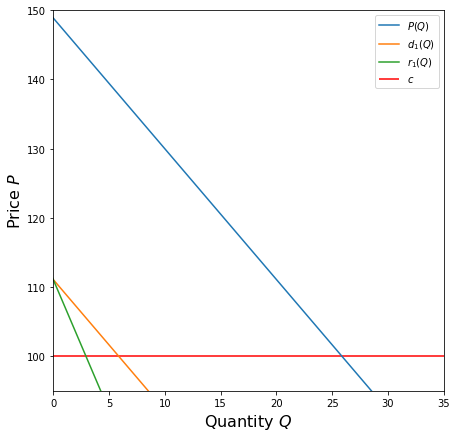

In [8]:
def P_fn(Q):
    return -1.89 * Q + 148.89

q_2 =  20

Qs = np.linspace(-100, 100, 1000)
Ps = P_fn(Qs)
d_1 = P_fn(Qs + q_2)
r_1 =  2 * P_fn(Qs + q_2) - P_fn(q_2)

plt.figure(figsize=[7,7])
plt.plot(Qs, Ps, label=r"$P(Q)$")
plt.plot(Qs, d_1, label=r"$d_1(Q)$")
plt.plot(Qs, r_1, label=r"$r_1(Q)$")
plt.hlines(100, -1, 100, color="r", label=r"$c$")
plt.xlim(0, 35)
plt.ylim(95, 150)
plt.xlabel(r"Quantity $Q$", size=16)
plt.ylabel(r"Price $P$", size=16)
plt.legend();

Based on this graph, if Boeing's prediction that Airbus will produce 20 units of output is correct, we can already tell what Boeing's optimal output is; but instead, let's use SymPy to calculate it.

In [9]:
c = 100
q_1 = sympy.Symbol("q_1")
r_1 = -3.78 * q_1 + 111.09

solve(r_1, c)

2.93386243386243

Therefore, if Boeing thinks that Airbus will produce 20 planes, they should produce 3.

Now, however, let's say that Boeing is unsure of it's guess for $q_2$. How can we arrive at the _actual_ Cournot equilibrium, the quantities at which both Boeing and Airbus should produce? We need to start by finding the monopoly quantity $q_m$ and the perfect competition quantity $q_c$. We can find $q_m$ by looking at Boeing's marginal revenue when Airbus is assumed to produce 0 planes. In this case, $d_1 = P(q_1 + 0) = -1.89 q_1 + 148.89$ and therefore $r_1 = -3.78 q_1 + 148.89$. We find $q_m$ as the point at which this new marginal revenue curve intersects the marginal cost curve.

In [10]:
r_1 = -3.78 * q_1 + 148.89
q_m = solve(r_1, c)
q_m

12.9338624338624

So the monopoly quantity is $q_m = 12.934$. To find the perfect competition quantity $q_c$, we need to find the point at which the market demand curve $P$ intersects the marginal cost.

In [11]:
Q = sympy.Symbol("Q")
P = -1.89 * Q + 148.89
q_c =  solve(P, c)
q_c

25.8677248677249

And thus we get $q_c = 25.868$. Now, we know that when Airbus is producing at $q_c$, Boeing is producing 0 planes because their marginal revenue is below the marginal cost for every value above 0. When Airbus is producing 0 planes, Boeing produces at $p_m$. From this, we have two points with which we can draw Boeing's reaction curve to Airbus's quantity choice $q'_1(q_2)$:

In [12]:
x1, y1 = 0, q_m
x2, y2 = q_c, 0

m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

print(f"y = {m} * x + {b}")

y = -0.500000000000000 * x + 12.9338624338624


Because the marginal cost is constant and the same for both Boeing and Airbus, Airbus's reaction function $q'_2(q_1)$ is symmetrical to Boeing's:

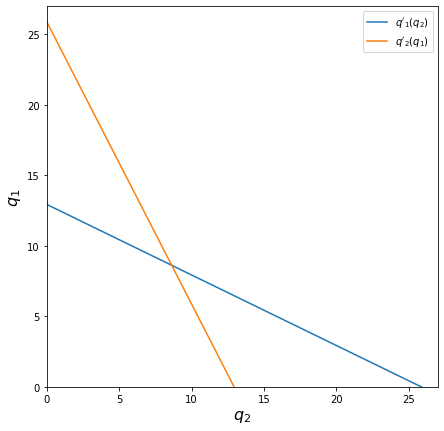

In [14]:
xs = np.linspace(-10, 30, 100)
ys1 = m * xs + b
ys2 = (xs - b) / m

plt.figure(figsize=[7,7])
plt.plot(xs, ys1, label=r"$q'_1(q_2)$")
plt.plot(xs, ys2, label=r"$q'_2(q_1)$")
plt.xlim([0, 27])
plt.ylim([0, 27])
plt.xlabel(r"$q_2$", size=16)
plt.ylabel(r"$q_1$", size=16)
plt.legend();

To get the exact values, let's use SymPy one last time:

In [15]:
q_2 = sympy.Symbol("q_2")
q_1_prime = -.5 * q_2 + q_m
q_2_prime = (q_2 - q_m) / (-.5)

q_2_star = solve(q_1_prime, q_2_prime)
q_1_star = q_1_prime.subs(q_2, q_2_star)
print(f"q_1_star = {q_1_star}\nq_2_star = {q_2_star}")

q_1_star = 8.62257495590830
q_2_star = 8.62257495590827
